#Model 1 Học máy

#Import thư viện

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
import nltk
import numpy as np
import matplotlib.pyplot as plt

#Đọc dữ liệu từ file exel

In [2]:
import os
os.chdir('/content')
!git clone https://github.com/NguyenXuanVinh2000/NLP-Classifcation

Cloning into 'NLP-Classifcation'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 1), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [3]:
xl1 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/train_nor_811.xlsx')
df_train = pd.read_excel(xl1, 0)
xl2 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/test_nor_811.xlsx')
df_test = pd.read_excel(xl2, 0 )
xl3 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/valid_nor_811.xlsx')
df_valid = pd.read_excel(xl3, 0 )

#Phân chia biến độc lập X và biến phụ thuộc y

In [4]:
X_train = df_train["Sentence"]
X_val = df_valid["Sentence"]
X_test = df_test["Sentence"]
y_train = df_train["Emotion"]
y_val = df_valid["Emotion"]
y_test = df_test["Emotion"]

In [5]:
print(y_train.value_counts())

Enjoyment    1558
Disgust      1071
Other        1021
Sadness       947
Anger         391
Fear          318
Surprise      242
Name: Emotion, dtype: int64


In [6]:
print(y_test.value_counts())

Enjoyment    193
Disgust      132
Other        129
Sadness      116
Fear          46
Anger         40
Surprise      37
Name: Emotion, dtype: int64


In [7]:
print(y_val.value_counts())

Enjoyment    214
Other        141
Disgust      135
Sadness       86
Anger         49
Fear          31
Surprise      30
Name: Emotion, dtype: int64


#Phân bố các nhãn của bình luận

Text(0, 0.5, 'so luong')

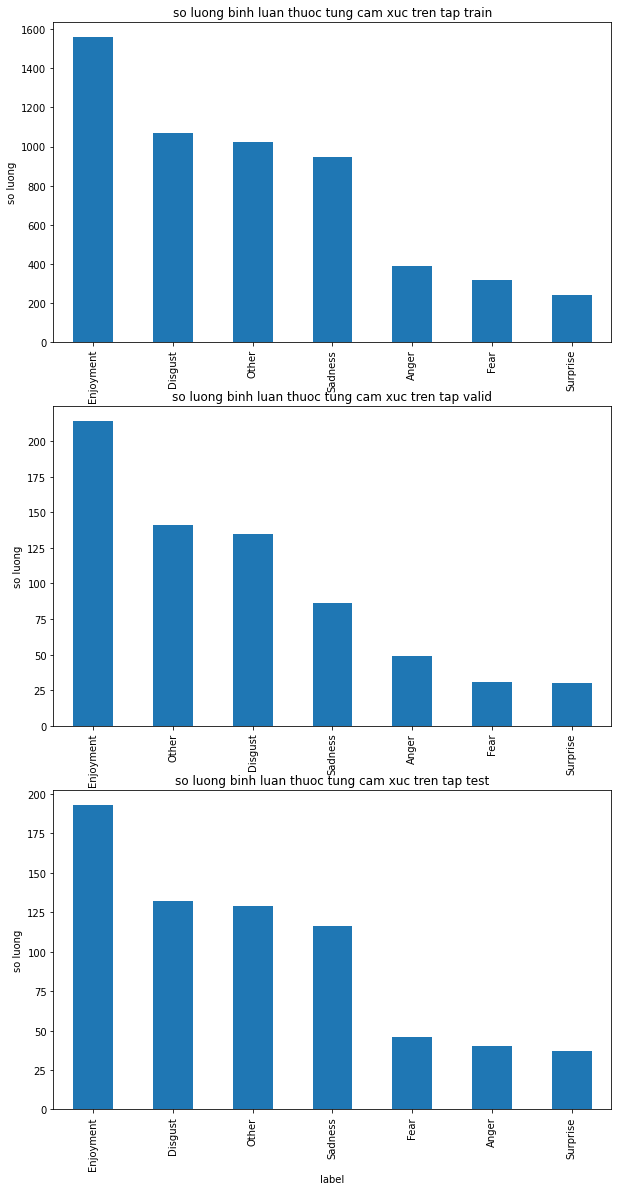

In [8]:
plt.figure(figsize=(10,20))
plt.subplot(311)
y_train.value_counts().plot(kind='bar')
plt.title('so luong binh luan thuoc tung cam xuc tren tap train')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(312)
y_val.value_counts().plot(kind='bar')
plt.title('so luong binh luan thuoc tung cam xuc tren tap valid')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(313)
y_test.value_counts().plot(kind='bar')
plt.title('so luong binh luan thuoc tung cam xuc tren tap test')
plt.xlabel('label')
plt.ylabel('so luong')

#Đánh số cho các nhãn có dạng “không ở dạng số”

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

#Huấn luyện model Naive Bayes

In [10]:
my_tags =['0','1','2','3','4','5','6']
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
model.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
val_pred = model.predict(X_val)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print('accuracy valid %s' % accuracy_score(y_val, val_pred))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.4531024531024531
accuracy valid 0.47959183673469385
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.47      0.56      0.51       132
           2       0.41      0.86      0.56       193
           3       0.00      0.00      0.00        46
           4       0.49      0.29      0.36       129
           5       0.65      0.32      0.43       116
           6       0.00      0.00      0.00        37

    accuracy                           0.45       693
   macro avg       0.29      0.29      0.27       693
weighted avg       0.40      0.45      0.39       693



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Huấn luyện model Support Vector Machine

In [11]:
my_tags =['0','1','2','3','4','5','6']
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SVC()),])
model.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
val_pred = model.predict(X_val)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print('accuracy valid %s' % accuracy_score(y_val, val_pred))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5367965367965368
accuracy valid 0.5349854227405247
              precision    recall  f1-score   support

           0       0.54      0.17      0.26        40
           1       0.51      0.64      0.56       132
           2       0.51      0.73      0.60       193
           3       0.91      0.46      0.61        46
           4       0.47      0.47      0.47       129
           5       0.65      0.47      0.55       116
           6       0.83      0.14      0.23        37

    accuracy                           0.54       693
   macro avg       0.63      0.44      0.47       693
weighted avg       0.57      0.54      0.52       693



#Model 2 Thuật toán học sâu

#Import thư viện

In [43]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Input, LSTM, Bidirectional, Conv1D
from keras.layers import Dropout, Embedding
from keras.preprocessing import text, sequence
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.models import Model
from keras import backend as K
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

#Đọc dữ liệu

In [44]:
X_train = df_train["Sentence"]
X_val = df_valid["Sentence"]
X_test = df_test["Sentence"]
y_train = df_train["Emotion"]
y_val = df_valid["Emotion"]
y_test = df_test["Emotion"]

# Tải model Pretrained model Word2Vec

In [14]:
import requests
url='https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.vi.300.vec.gz'
r = requests.get(url, allow_redirects=True)

open('cc.vi.300.vec.gz','wb').write(r.content)

1235219084

# extract file gzip chứa model Word2Vec

In [15]:
import gzip

def gunzip(source_filepath, dest_filepath, block_size=65536):
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        while True:
            block = s_file.read(block_size)
            if not block:
                break
            else:
                d_file.write(block)
gunzip('/content/cc.vi.300.vec.gz','/content/cc.vi.300.vec')

In [45]:
EMBEDDING_FILE = '/content/cc.vi.300.vec'

In [46]:
y_train=pd.get_dummies(data=y_train)
y_val=pd.get_dummies(data=y_val)
y_test=pd.get_dummies(data=y_test)

In [47]:
y_train.head(5)

,Anger,Disgust,Enjoyment,Fear,Other,Sadness,Surprise
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


# Tiền xử lý dữ liệu

In [48]:
max_features=2489
maxlen=150
embed_size=300

In [49]:
tokenizer = text.Tokenizer(num_words=max_features, lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(list(X_train))

In [50]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [51]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
X_val = sequence.pad_sequences(X_val, maxlen=maxlen)
print("create vector")

create vector


In [52]:
embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

word_index = tokenizer.word_index
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))

In [53]:
for word, i in word_index.items():
    if i >= max_features:
        continue
  
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [54]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Tạo và training model với Bi-LSTM

In [55]:
inp = Input(shape=(maxlen,))

x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=True)(inp)
x = SpatialDropout1D(0.35)(x)

x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(x)
x = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])

out = Dense(7, activation='sigmoid')(x)

model = Model(inp, out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [56]:
batch_size = 32
epochs =5

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=1)
predictions = model.predict(X_test, batch_size=batch_size, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5548 samples, validate on 686 samples
Epoch 1/5
5548/5548 [==============================] - 105s 19ms/step - loss: 0.3757 - acc: 0.8554 - f1_m: 0.0626 - precision_m: 0.2207 - recall_m: 0.0429 - val_loss: 0.3144 - val_acc: 0.8746 - val_f1_m: 0.3278 - val_precision_m: 0.6955 - val_recall_m: 0.2185
Epoch 2/5
5548/5548 [==============================] - 103s 19ms/step - loss: 0.2849 - acc: 0.8826 - f1_m: 0.4344 - precision_m: 0.6968 - recall_m: 0.3236 - val_loss: 0.2726 - val_acc: 0.8882 - val_f1_m: 0.4766 - val_precision_m: 0.7143 - val_recall_m: 0.3618
Epoch 3/5
5548/5548 [==============================] - 103s 19ms/step - loss: 0.2333 - acc: 0.9036 - f1_m: 0.5901 - precision_m: 0.7503 - recall_m: 0.4918 - val_loss: 0.2716 - val_acc: 0.8886 - val_f1_m: 0.5172 - val_precision_m: 0.6709 - val_recall_m: 0.4229
Epoch 4/5
5548/5548 [==============================] - 103s 19ms/step - loss: 0.1953 - acc: 0.9201 - f1_m: 0.6831 - precision_m: 0.7849 - recall_m: 0.6074 - val_loss: 0.2781

# Đánh giá Model

In [57]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test metrics:', score)

693/693 [==============================] - 1s 1ms/step
Test metrics: [0.2857225423337405, 0.8843538165092468, 0.5380197167396545, 0.6278846263885498, 0.47328194975852966]


In [58]:
result = y_test.copy()
result[['Anger', 'Disgust', 'Enjoyment', 'Fear', 'Other', 'Sadness', 'Surprise']] = predictions
result['Emition']=0

from sklearn.metrics import classification_report
y_pred = np.argmax(np.array(result[['Anger', 'Disgust', 'Enjoyment', 'Fear', 'Other', 'Sadness', 'Surprise']]), axis=1)
y_pred_bool= pd.DataFrame({'Emition':y_pred})

y_pred_bool.to_csv('result.csv')
model_json = model.to_json()
with open("model_num_bc.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

print(classification_report(y_test, pd.get_dummies(data=y_pred_bool, columns=['Emition'])))

              precision    recall  f1-score   support

           0       0.47      0.47      0.48        40
           1       0.60      0.59      0.60       132
           2       0.62      0.64      0.63       193
           3       0.58      0.67      0.63        46
           4       0.41      0.43      0.42       129
           5       0.64      0.53      0.58       116
           6       0.44      0.46      0.45        37

   micro avg       0.56      0.56      0.56       693
   macro avg       0.54      0.54      0.54       693
weighted avg       0.56      0.56      0.56       693
 samples avg       0.56      0.56      0.56       693



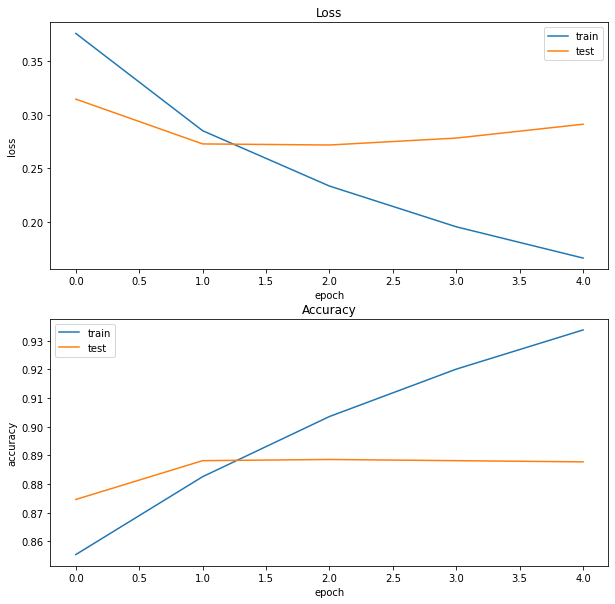

In [59]:
# plot loss during training
plt.figure(figsize=[10,10])
plt.subplot(211)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()